<a href="https://colab.research.google.com/github/abbi-berg/Facial-image-detection-model/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

### **Context:** <br>
Deep learning enables the analysis of unstructured data, including image data for emotion detection. Emotion AI focuses on developing systems that can understand and respond to human emotions by analyzing facial expressions and other cues. Accurate facial emotion recognition systems could enable mental health diagnostics, improve customer service platforms, and help businesses make decisions based on customers’ perceptions of products in stores or restaurants.
<br>

### **Objectives:**<br>
The objective of this project is to leverage deep learning and artificial intelligence techniques to develop a computer vision model capable of accurately detecting facial emotions. The model will perform multi-class classification on images of facial expressions, categorizing them according to the associated emotions. <br>

### **Key questions:**<br>
- What preprocessing steps are necessary to ensure the quality and consistency of the images?
- Which deep learning architectures are best suited for facial emotion recognition?
- How will the model be trained and validated?
- Can we leverage pretrained model to improve the model performance?
- Should we perform data augmentation and what effect will this have on the model performance?
- How will overfitting be prevented during training?
- How can we deploy this model for real-world application?
- What will be the limitations of the model?
- How will privacy and ethical concerns be addressed when using facial emotion recognition technology?

### **Problem formulation:**
- Are we able to detect emotion accurately in facial images?
- The problem is that human emotion is complex and multifaceted. People have different ways of showing emotion. Can we find the generalize patterns to detect emotion across many people?


### **Dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
# To set up neural networks
import tensorflow as tf

# To create ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import BatchNormalization

# For data manipulation
import numpy as np
import pandas as pd

# To visualize images
import matplotlib.pyplot as plt

# To visualize prediction data
import seaborn as sns

# To load SVHN dataset
import h5py

#To create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#interact with opperating system
import os

# Open Source Computer Vision Library
import cv2

### **Unzip the data**

In [ ]:
#Load images from zip file
import zipfile

# Extract files from zip file
with zipfile.ZipFile('drive/MyDrive/Facial_emotion_images.zip', 'r') as zip:
    zip.extractall()

## **Visualize Dataset**

### **Happy**

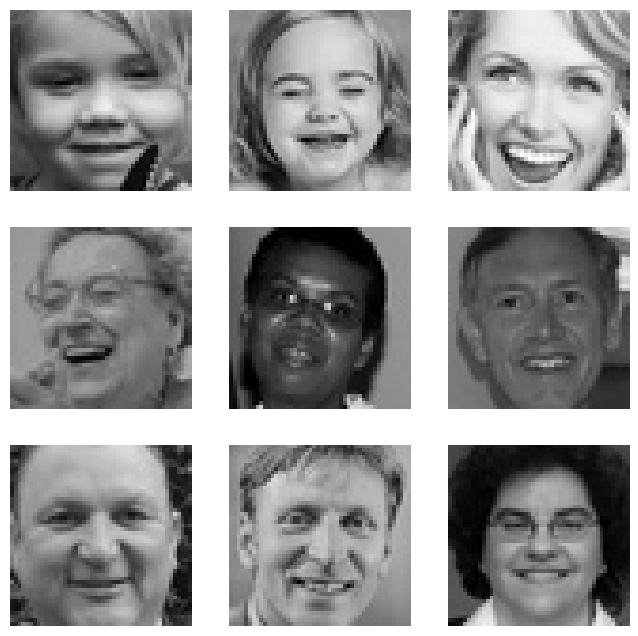

In [ ]:
import cv2

# Define the expression and folder path
expression = 'happy'
folder_path = 'Facial_emotion_images/'

# Define the picture size
picture_size = 48

# Create a figure for displaying images
plt.figure(figsize=(8, 8))

# Loop to display 9 images
for i in range(1, 10):
    plt.subplot(3, 3, i)

    # Construct the image path
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])

    # Load the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (picture_size, picture_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

# Show the plot
plt.show()

**Observations and Insights:**
- The corners of the mouth are tuned up.
- Teeth are visible in most photos.
- Cheeks are often raised.
- The eyes are lively and bright.
- You could argue that the middle image looks more so neutral, but is slightly ambiguous.

### **Sad**

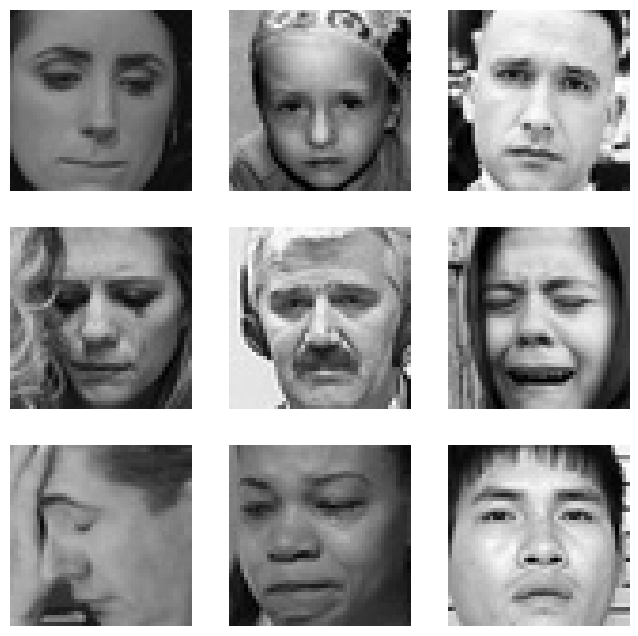

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the expression and folder path
expression = 'sad'
folder_path = 'Facial_emotion_images/'

# Define the picture size
picture_size = 48

# Create a figure for displaying images
plt.figure(figsize=(8, 8))

# Loop to display 9 images
for i in range(1, 10):
    plt.subplot(3, 3, i)

    # Construct the image path
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])

    # Load the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (picture_size, picture_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

# Show the plot
plt.show()

**Observations and Insights:**
- In all photos, the individuals have their lips closed.
- In most photos, the eyes are not directed at the camera.
- Some individuals have their eyes closed.
- Some individuals are looking down.
- All are frowning.

### **Neutral**

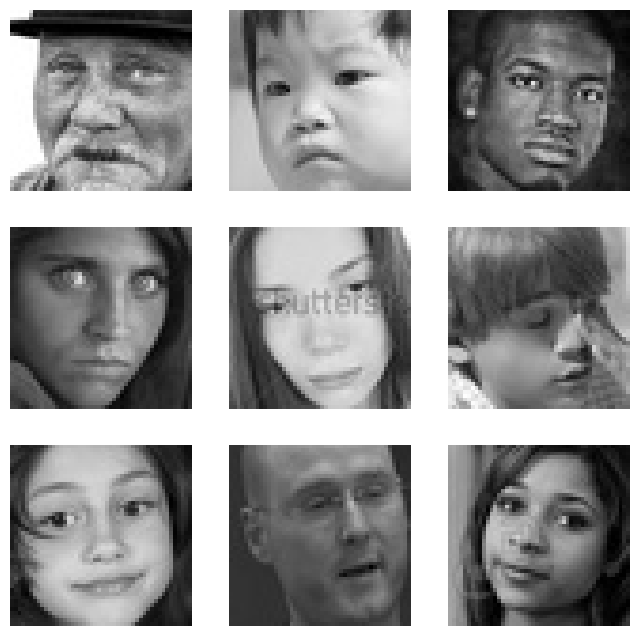

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the expression and folder path
expression = 'neutral'
folder_path = 'Facial_emotion_images/'

# Define the picture size
picture_size = 48

# Create a figure for displaying images
plt.figure(figsize=(8, 8))

# Loop to display 9 images
for i in range(1, 10):
    plt.subplot(3, 3, i)

    # Construct the image path
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])

    # Load the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (picture_size, picture_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

# Show the plot
plt.show()

**Observations and Insights:**
- Lip crease is flat line
- Most photos do not show teeth, maintaining a neutral expression. However, the photo in the top right corner looks more like he is tired.
- The facial muscles appear relaxed, with no pronounced tension or movement.


### **Surprised**

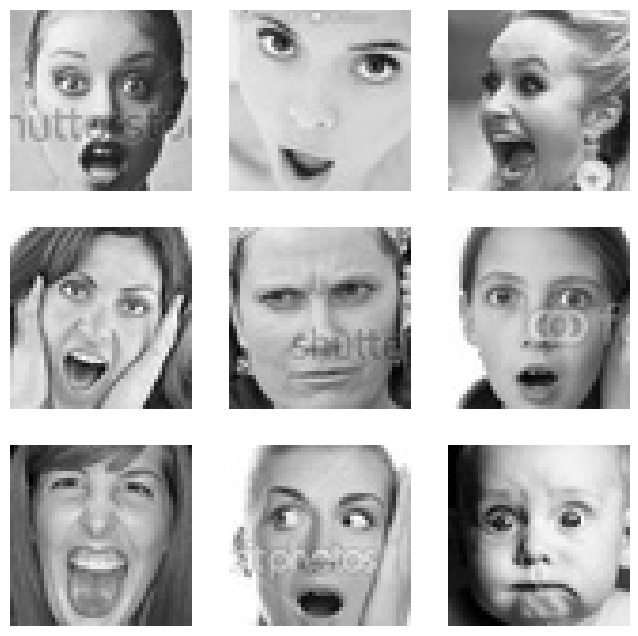

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the expression and folder path
expression = 'surprise'
folder_path = 'Facial_emotion_images/'

# Define the picture size
picture_size = 48

# Create a figure for displaying images
plt.figure(figsize=(8, 8))

# Loop to display 9 images
for i in range(1, 10):
    plt.subplot(3, 3, i)

    # Construct the image path
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])

    # Load the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (picture_size, picture_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

# Show the plot
plt.show()

**Observations and Insights:**
- Many of the images feature individuals with open mouths and/or hands on their face.
- All images show wide eyes.
- Eyebrows are typically raised high on the forehead.
- The mouth is usually open, forming an “O” shape.
- Nostrils are often flared.

**Additional Observations:**
- Of the 36 pictures displayed, 23 were of women. If this trend is consistent throughout the dataset, it could introduce gender bias into the model.

## **Checking Distribution of Classes**

In [ ]:
#Inspect images
os.listdir('Facial_emotion_images/validation/')
#Images are seperated into test, train and validation sets

# Main directory
main_dir = 'Facial_emotion_images/'

# Image sets
subfolders = ['test', 'train', 'validation']

# Image categories
categories = ['happy', 'neutral', 'sad', 'surprise']

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

# Function to count images in a folder
def count_images(folder_path):
    return sum(1 for file in os.listdir(folder_path) if file.endswith(image_extensions))

# Iterate through each subfolder and category to count images
for subfolder in subfolders:
    print(f"\n{subfolder.capitalize()} Subfolder:")
    for category in categories:
        category_path = os.path.join(main_dir, subfolder, category)
        num_images = count_images(category_path)
        print(f"  {category.capitalize()}: {num_images} images")


Test Subfolder:
  Happy: 32 images
  Neutral: 32 images
  Sad: 32 images
  Surprise: 32 images

Train Subfolder:
  Happy: 3976 images
  Neutral: 3978 images
  Sad: 3982 images
  Surprise: 3173 images

Validation Subfolder:
  Happy: 1825 images
  Neutral: 1216 images
  Sad: 1139 images
  Surprise: 797 images


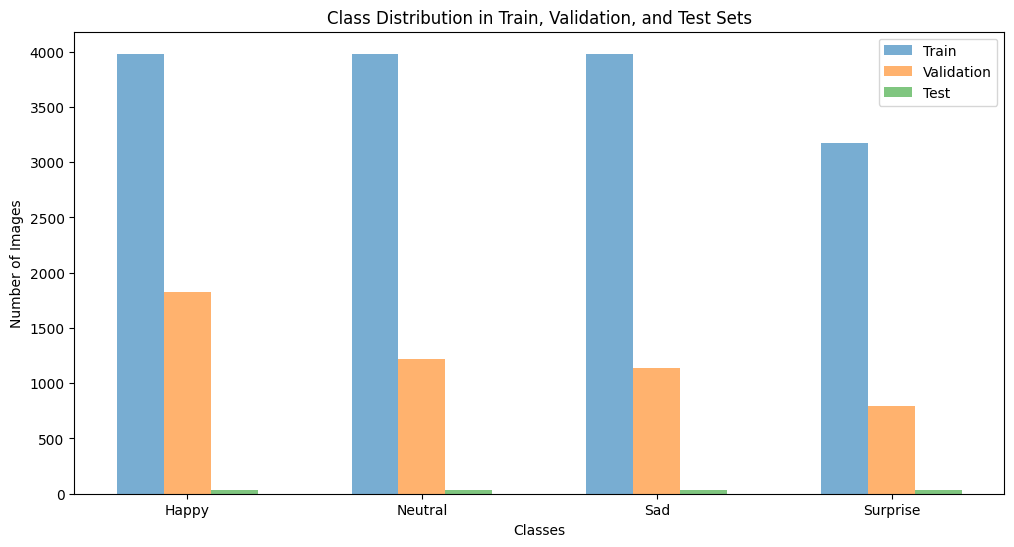

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['Happy', 'Neutral', 'Sad', 'Surprise']
train_counts = [3976, 3978, 3982, 3173]
val_counts = [1825, 1216, 1139, 797]
test_counts = [32, 32, 32, 32]

bar_width = 0.2
index = np.arange(len(classes))

plt.figure(figsize=(12, 6))
plt.bar(index, train_counts, bar_width, alpha=0.6, label='Train')
plt.bar(index + bar_width, val_counts, bar_width, alpha=0.6, label='Validation')
plt.bar(index + 2 * bar_width, test_counts, bar_width, alpha=0.6, label='Test')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Train, Validation, and Test Sets')
plt.xticks(index + bar_width, classes)
plt.legend()
plt.show()

In [ ]:
total_train = sum(train_counts)
total_val = sum(val_counts)

train_percentages = [count / total_train * 100 for count in train_counts]
val_percentages = [count / total_val * 100 for count in val_counts]

print("Training Set Class Percentages:", train_percentages)
print("Validation Set Class Percentages:", val_percentages)

Training Set Class Percentages: [26.31544112780462, 26.328678271229066, 26.355152558077965, 21.000728042888344]
Validation Set Class Percentages: [36.668675909182234, 24.432388989351015, 22.88527225236086, 16.013662849105888]


**Observations and Insights:**
- The test set is significantly smaller than the other datasets. This is risky because the test set may not be a statistically significant sample of the dataset and may not reliably capture the variability in the data. As a result, our performance metrics may not be as reliable. We could adjust the distribution so that the test set is closer to 20% of the combined test and training dataset.
- There is a noticeable imbalance, particularly with the “Surprise” class within both the training and validation sets having fewer images compared to the others. This limited data could hinder the model’s ability to accurately detect the “Surprise” category.
- The “Neutral” and “Sad” classes have a relatively balanced number of images in the training set, but the validation set shows a noticeable drop in the number of “Neutral” images compared to “Happy” and “Sad”.


#### **Think About It:**
* **Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?**
    - As mentioned above, we do have some concerns with the balance of the classes in the Train and Validation datasets. It will be important to monitor this imbalance and test methods to minimize its effect on the model performance. Some methods to manage imbalanced datasets include:
    
        - **Use F1 Score:** The F1 score balances both precision (the accuracy of positive predictions) and recall (the ability to find positive instances). This ensures a more comprehensive assessment of the model’s effectiveness across all classes.
        
        - **Sampling Techniques:** We could deploy oversampling or undersampling to balance the dataset.
            - To **oversample** we could deploy random oversampling which would duplicate images from the minority class.
            - **Undersampling:**  we could reduce the number of instances in the majority classes to match the number in the minority class.
            
* **Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?**
    - class distribution
    - look at the images
    - image quality and size


In [ ]:
# Check image size across classes and datasets
from PIL import Image # Python Imaging Library: provides extensive file format support, an efficient internal representation, and image processing capabilities


# Define the path
main_dir = 'Facial_emotion_images/'
subfolders = ['test', 'train', 'validation']
categories = ['happy', 'neutral', 'sad', 'surprise']

# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size

# Iterate through each subfolder and category to check image dimensions
for subfolder in subfolders:
    print(f"\n{subfolder.capitalize()} Subfolder:")
    for category in categories:
        category_path = os.path.join(main_dir, subfolder, category)
        image_names = os.listdir(category_path)[:10]  # Limit to 10 images
        for image_name in image_names:
            image_path = os.path.join(category_path, image_name)
            dimensions = get_image_dimensions(image_path)
            print(f"{category.capitalize()} - {image_name}: {dimensions}")


Test Subfolder:
Happy - 15817.jpg: (48, 48)
Happy - 15789.jpg: (48, 48)
Happy - 15705.jpg: (48, 48)
Happy - 15852.jpg: (48, 48)
Happy - 15710.jpg: (48, 48)
Happy - 15810.jpg: (48, 48)
Happy - 15781.jpg: (48, 48)
Happy - 15792.jpg: (48, 48)
Happy - 15744.jpg: (48, 48)
Happy - 15748.jpg: (48, 48)
Neutral - 7404.jpg: (48, 48)
Neutral - 7227.jpg: (48, 48)
Neutral - 7422.jpg: (48, 48)
Neutral - 7294.jpg: (48, 48)
Neutral - 7276.jpg: (48, 48)
Neutral - 7326.jpg: (48, 48)
Neutral - 7399.jpg: (48, 48)
Neutral - 7395.jpg: (48, 48)
Neutral - 7304.jpg: (48, 48)
Neutral - 7324.jpg: (48, 48)
Sad - 6856.jpg: (48, 48)
Sad - 6858.jpg: (48, 48)
Sad - 6798.jpg: (48, 48)
Sad - 6817.jpg: (48, 48)
Sad - 6913.jpg: (48, 48)
Sad - 7000.jpg: (48, 48)
Sad - 6984.jpg: (48, 48)
Sad - 6832.jpg: (48, 48)
Sad - 6939.jpg: (48, 48)
Sad - 6866.jpg: (48, 48)
Surprise - 175.jpg: (48, 48)
Surprise - 269.jpg: (48, 48)
Surprise - 26.jpg: (48, 48)
Surprise - 88.jpg: (48, 48)
Surprise - 39.jpg: (48, 48)
Surprise - 252.jpg: (

**Observations:**
- The images are (48, 48) which means that they are 48 pixels wide by 48 pixels tall and are a perfect square.
- We have fairly low resolution in the images as seen in the printed images. 48 x 48 pixels = 2,304 total pixels which is relatively low and could impact the models ability to pick up on subtle or complex features.
- We will need to adjust our model so that it accepts 48x48 images.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #provides real-time data augmentation and preprocessing of image data

batch_size  = 32 # number of images to work with at a time
img_size = 48 # size of images
folder_path = 'Facial_emotion_images/'

# TRAINING SET
# Define data augmentation and preprocessing
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   #  x (Would not want to use if direction matters like text images)
                                    brightness_range=(0.,2.),
                                    # simulate different lighting conditions, make model more robust to variations in brightness. can be scaled down to 0 (completely dark) or up to 2 (twice as bright as the original).
                                    rescale=1./255,
                                    # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
                                    # Helps make convergence happen quicker: Gradients during backpropagation are more balanced, preventing some weights from updating too quickly or too slowly
                                    shear_range=0.3)
                                    # shifting the pixels in a direction parallel to a given axis. simulates the effect on camera angle changing.

# Load and augment training data
train_set = datagen_train.flow_from_directory(folder_path + "train", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = True) # shuffles the data at each epoch

# TEST SET
# Define data augmentation and preprocessing
datagen_test = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
test_set = datagen_test.flow_from_directory(folder_path + "test", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

# VALIDATION SET
# Define data augmentation and preprocessing
datagen_val = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
validation_set = datagen_val.flow_from_directory(folder_path + "validation", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


**Observations:**
- We created our test_set, train_set and validation_set datasets.
- We performed some image augmentation to the training set including flipping, brightness range, and shear ranging to simulate different picture orrientations, brightness and tilts.
- We performed rescaling on all the sets to standardize the pixel values

# **Model Building**

**Think About It:**
* **Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?**
    - A CNN is a good approach since we are dealing with image data as they capture spatial hierarchies in images through convolutional layers. This allows them to identify important features in images such as edges, textures, and shapes.
    - We can also leverage kernels rather than needing a weight for each pixel which will make our model more computationally efficient.

* **What are the advantages of CNNs over ANNs and are they applicable here?**
    - We saw in the elective model and example of how accuracy improves analyzing image data with CNNs.
    - CNNs will better be able to extract relevant features using the convolutional layers.

#**1. CNN Model**

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## **Model Architecture**
- Three convolutional layers that will help extract features from the image.
    - Convolutions are slide pattern detectors. Ours will slide through each 3x3 pixel section to produce a feature map.
    - Each filter slides over the input image, performing element-wise multiplication and summing the results to produce a feature map.
- We will seperate the 3 convolutional layers with a MaxPooling layer inbetween. This will reduce the spatial dimentions of the feature map.

- Flatten the output of the convolutional layers for further processing by the Dense models.
- 2 Dense layers seperated by a dropout layer.
    - Dropout layer will help prevent overfitting

- Use soft max in the output layer to assign probability of each class to each image

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model_def_1():
    # Create Sequential Model Object
    model = Sequential()

    # First Convolutional layer
    # 32 filters, kernel size of 3x3
    # Each filter is designed to detect specific features in the image. For example, one filter might detect horizontal edges, while another detects vertical edges.
    # input shape = (48, 48, 1) # 1 for grayscale images
    # Activation function is relu
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    # The output of the convolution operation will represent the presence of specific features at different spatial locations in the input image.

    # Choosing not to include padding which would ensure that that edge features are not lost. Most of the important features of the images should be in the center of the photo
    # and this would increase the computational load as including it would increase the spatial dimensions of the feature maps.

    #Max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # The pooling layer will further reduce the dimensions of the data.
    # It will run through each 2x2 area of the image and select the max value from the section. We could also use average pooling instead.

    # Second convolutional layer
    # with 64 filters and a kernel size of 3x3
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    # with 128 filters and a kernel size of 3x3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())
    # will reshapes into a vector that can be fed into the fully connected (dense) layers

    # Fully connected layer
    # Classify the features extracted by the convolutional layers.
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    # prevents overfitting by randomly setting some inputs to zero during trianing. Will help model generalize better by reducing its reliance on specific neurons.
    model.add(Dropout(0.5))  # 50 % of neurons will be dropped in each itteration

    # Output layer
    model.add(Dense(4, activation='softmax'))  # 4 classes for the emotions
    # Softmax for classification problem
        #  It converts the raw output scores (logits) from the network into probabilities, which sum to 1.

    # Compile the model
    model.compile(optimizer='adam', # The optimizer adjusts the model’s weights
                  loss='categorical_crossentropy', # # The loss function quantifies how well the model is performing
                  metrics=['accuracy']) # track how often the predictions match the true labels
    return model

In [ ]:
# Store model in varriable
model_1 = model_def_1()

# Print the summary of the model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,460 (1.36 MB)

 Trainable params: 355,460 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAINING THE MODEL
model_1_history = model_1.fit(
            train_set,
            validation_data=validation_set, # Use the separate validation set
            batch_size=32, # The model will process 32 samples at a time.
            verbose=1, # This will display the progress of training in the console.
            epochs=20 # The model will train for 20 epochs.
            )

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 91s 188ms/step - accuracy: 0.3219 - loss: 1.3395 - val_accuracy: 0.5455 - val_loss: 1.0837
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 76s 160ms/step - accuracy: 0.5060 - loss: 1.1196 - val_accuracy: 0.5994 - val_loss: 0.9577
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 80s 168ms/step - accuracy: 0.5609 - loss: 1.0193 - val_accuracy: 0.6178 - val_loss: 0.8953
Epoch 4/20
313/473 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.5920 - loss: 0.9588

In [ ]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**
- Training accuracy has increased from 31.71% to 72.03% over 20 epochs.
- Validation accuracy has also improved, reaching around 71.23%. This accuracy is reached out about the 9th epoch.
- Training loss has decreased from 1.3415 to 0.6675.
- Validation loss has also decreased, although it fluctuates slightly towards the end.

### **Evaluating the Model on the Test Set**

In [ ]:
# Make Predictions on test set
test_pred_1 = model_1.predict(test_set)
# Will return array of probabilities for each class

#For each image, returns index for highest probability class
test_pred_1 = [np.argmax(i) for i in test_pred_1]

# Get true labels from the test set
test_labels = test_set.classes

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred_1)

In [ ]:
# Evaluate performance on Test

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, test_pred_1, target_names=test_set.class_indices.keys()))

**Observations and Insights:**
- The model suprisingly performs well on the “surprise” class with high precision and F1-score. Even though the datasets for the training and validation sets had less suprise labeled images. Potentially it is still able to perform well because the features of suprise are very distinct from the other features (mouth open, hands on face, etc)
- The “neutral” class has lower precision and recall, indicating that the model might be struggling to distinguish neutral expressions from other emotions.
- The 'greyscale' loader is doing well representing the data which makes sense because the images are already in black and white.

## **2. CNN Model**

- Try out a slightly larger architecture

In [ ]:
#Clear model
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

For this model I am going to **remove the 3 pooling layers**. This will increase the computational load on the model, but will maintain more features from the original image

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model_def_2():
    # Create Sequential Model Object
    model = Sequential()

    # First Convolutional layer
    # 32 filters, kernel size of 3x3
    # Each filter is designed to detect specific features in the image. For example, one filter might detect horizontal edges, while another detects vertical edges.
    # input shape = (48, 48, 1) # 1 for grayscale images
    # Activation function is relu
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    # The output of the convolution operation will represent the presence of specific features at different spatial locations in the input image.

    # Choosing not to include padding which would ensure that that edge features are not lost. Most of the important features of the images should be in the center of the photo
    # and this would increase the computational load as including it would increase the spatial dimensions of the feature maps.

    # Second convolutional layer
    # with 64 filters and a kernel size of 3x3
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # Third convolutional layer
    # with 128 filters and a kernel size of 3x3
    model.add(Conv2D(128, (3, 3), activation='relu'))

    # Flatten the output
    model.add(Flatten())
    # will reshapes into a vector that can be fed into the fully connected (dense) layers

    # Fully connected layer
    # Classify the features extracted by the convolutional layers.
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    # prevents overfitting by randomly setting some inputs to zero during trianing. Will help model generalize better by reducing its reliance on specific neurons.
    model.add(Dropout(0.5))  # 50 % of neurons will be dropped in each itteration

    # Output layer
    model.add(Dense(4, activation='softmax'))  # 4 classes for the emotions
    # Softmax for classification problem
        #  It converts the raw output scores (logits) from the network into probabilities, which sum to 1.

    # Compile the model
    model.compile(optimizer='adam', # The optimizer adjusts the model’s weights
                  loss='categorical_crossentropy', # # The loss function quantifies how well the model is performing
                  metrics=['accuracy']) # track how often the predictions match the true labels
    return model

In [ ]:
# Store model in varriable
model_2 = model_def_2()

# Print the summary of the model
model_2.summary()

### **Compiling and Training the Model**

In [ ]:
# Did compiling in the section above.

# TRAINING THE MODEL
model_2_history = model_2.fit(
            train_set,
            validation_data=validation_set, # Use the separate validation set
            batch_size=32, # The model will process 32 samples at a time.
            verbose=1, # This will display the progress of training in the console.
            epochs=20 # The model will train for 20 epochs.
            )

In [ ]:
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**
- Training Accuracy: Increased significantly from 32.46% to 87.70%.
- Validation Accuracy: Plateaued around 64.58%.
- I think I should have used early stopping which stops training when the validation loss stops improving to prevent overfitting.
- The pooling layers seemed to help the model generalize and reduced overfitting

### **Evaluating the Model on the Test Set**

In [ ]:
# Make Predictions on test set
test_pred_2 = model_2.predict(test_set)
# Will return array of probabilities for each class

#For each image, returns index for highest probability class
test_pred_2 = [np.argmax(i) for i in test_pred_2]

# Get true labels from the test set
test_labels = test_set.classes

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred_2)

In [ ]:
# Evaluate performance on Test

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, test_pred_2, target_names=test_set.class_indices.keys()))

**Observations and Insights:**
- The F1 scores were relatively high. Consistent with the last model, the lowest F1 score was .63 for Suprise. The second lowest for this model was happy at .70.
- The surprise class had the highest f1-score of 0.84, showing strong performance.
- Overall this model appears to overfitting, evident by its poor performance on the validation data.

## **3. CNN Model**

In [ ]:
#Clear model
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def model_def_3():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
# Store model in varriable
model_3 = model_def_3()

# Print the summary of the model
model_3.summary()

In [ ]:
# Add early stopping
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TRAINING THE MODEL
model_3_history = model_3.fit(
            train_set,
            validation_data=validation_set, # Use the separate validation set
            batch_size=32, # The model will process 32 samples at a time.
            verbose=1, # This will display the progress of training in the console.
            epochs=20, # The model will train for 20 epochs.
            callbacks=[early_stopping]  # Add early stopping callback
            )

In [ ]:
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_3_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**
- There are some fluctuations in the validation accuracy and loss. The fluctuations in validation accuracy and loss, especially the drop in validation accuracy in the later epochs, suggest potential overfitting. The model might be starting to memorize the training data rather than generalizing from it.
- We could try adding regularization to prevent this overfitting.
- We could consider fine-tuning a pre-trained model like VGG16, ResNet, or Inception since they have been trained on large datasets.

## **4. CNN Model**

In [ ]:
#Clear model
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

def model_def_4():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
# Store model in varriable
model_4 = model_def_4()

# Print the summary of the model
model_4.summary()

In [ ]:
# Add early stopping
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TRAINING THE MODEL
model_4_history = model_4.fit(
            train_set,
            validation_data=validation_set, # Use the separate validation set
            batch_size=32, # The model will process 32 samples at a time.
            verbose=1, # This will display the progress of training in the console.
            epochs=20, # The model will train for 20 epochs.
            callbacks=[early_stopping]  # Add early stopping callback
            )

In [ ]:
plt.plot(model_4_history.history['accuracy'])
plt.plot(model_4_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**
- Lots of flucation in the validation accuracy. Will try implementing a learning rate adjuster.

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Define a learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TRAINING THE MODEL
model_4_history = model_4.fit(
            train_set,
            validation_data=validation_set,
            batch_size=32,
            verbose=1,
            epochs=30,
            callbacks=[early_stopping, lr_scheduler]  # Add early stopping and learning rate scheduler callbacks
            )

In [ ]:
plt.plot(model_4_history.history['accuracy'])
plt.plot(model_4_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**
- The model is making progress with the addition of the L2 regularization and learning rate scheduler.
- The learning rate adjuster does appear to help the model converge more smoothly by reducing the learning rate over time, but at about the 25th epoch, the training accuracy continues to improve while the validation accuracy stays the same.


## **5. CNN Model**
- Test rgb color mode on 1st model archetecture

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #provides real-time data augmentation and preprocessing of image data

batch_size  = 32 # number of images to work with at a time
img_size = 48 # size of images
folder_path = 'Facial_emotion_images/'

# TRAINING SET
# Define data augmentation and preprocessing
datagen_train_rgb = ImageDataGenerator(horizontal_flip = True,
                                   #  Randomly flips the images horizontally (Would not want to use if direction matters like text images)
                                    brightness_range=(0.,2.),
                                    # simulate different lighting conditions, make model more robust to variations in brightness. can be scaled down to 0 (completely dark) or up to 2 (twice as bright as the original).
                                    rescale=1./255,
                                    # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
                                    # Helps make convergence happen quicker: Gradients during backpropagation are more balanced, preventing some weights from updating too quickly or too slowly
                                    shear_range=0.3)
                                    # shifting the pixels in a direction parallel to a given axis. simulates the effect on camera angle changing.

# Load and augment training data
train_set_rgb = datagen_train.flow_from_directory(folder_path + "train", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = True) # shuffles the data at each epoch

# TEST SET
# Define data augmentation and preprocessing
datagen_test_rgb = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
test_set_rgb = datagen_test.flow_from_directory(folder_path + "test", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

# VALIDATION SET
# Define data augmentation and preprocessing
datagen_val_rgb = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
validation_set_rgb = datagen_val.flow_from_directory(folder_path + "validation", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def model_def_1():
    # Create Sequential Model Object
    model = Sequential()

    # First Convolutional layer
    # 32 filters, kernel size of 3x3
    # Each filter is designed to detect specific features in the image. For example, one filter might detect horizontal edges, while another detects vertical edges.
    # input shape = (48, 48, 1) # 1 for grayscale images
    # Activation function is relu
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
    # The output of the convolution operation will represent the presence of specific features at different spatial locations in the input image.

    # Choosing not to include padding which would ensure that that edge features are not lost. Most of the important features of the images should be in the center of the photo
    # and this would increase the computational load as including it would increase the spatial dimensions of the feature maps.

    #Max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # The pooling layer will further reduce the dimensions of the data.
    # It will run through each 2x2 area of the image and select the max value from the section. We could also use average pooling instead.

    # Second convolutional layer
    # with 64 filters and a kernel size of 3x3
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    # with 128 filters and a kernel size of 3x3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())
    # will reshapes into a vector that can be fed into the fully connected (dense) layers

    # Fully connected layer
    # Classify the features extracted by the convolutional layers.
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    # prevents overfitting by randomly setting some inputs to zero during trianing. Will help model generalize better by reducing its reliance on specific neurons.
    model.add(Dropout(0.5))  # 50 % of neurons will be dropped in each itteration

    # Output layer
    model.add(Dense(4, activation='softmax'))  # 4 classes for the emotions
    # Softmax for classification problem
        #  It converts the raw output scores (logits) from the network into probabilities, which sum to 1.

    # Compile the model
    model.compile(optimizer='adam', # The optimizer adjusts the model’s weights
                  loss='categorical_crossentropy', # # The loss function quantifies how well the model is performing
                  metrics=['accuracy']) # track how often the predictions match the true labels
    return model

In [ ]:
# Store model in varriable
model_1 = model_def_1()

# Print the summary of the model
model_1.summary()

In [ ]:
# Did compiling in the section above.

# TRAINING THE MODEL
model_1_history_rgb = model_1.fit(
            train_set_rgb,
            validation_data=validation_set_rgb, # Use the separate validation set
            batch_size=32, # The model will process 32 samples at a time.
            verbose=1, # This will display the progress of training in the console.
            epochs=20 # The model will train for 20 epochs.
            )

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_1_history_rgb.history['accuracy'])
plt.plot(model_1_history_rgb.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**
- The rgb model performed better in terms of training accuracy (75 v 72 for greyscale) and validation accuracy (72 v 71 for greyscale), however the model appears to be overfitting. The training validation surpases the validation accuracy at the 13th epoch.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
    - I think my 1st model performed the best because the training and validation accuracies were both similar and above 70%. This model still did not perform well on the neutral class with an F1 of only 58. It would be important to improve this category otherwise the model will recognize neutral emotion as sad.
    - The reason that the neutral classification is difficult to classify is because the emotion features are subtle and closely related to the sad features.

* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?
    - My rgb classifier performed better than my greyscale classifier when you compare training and validation accuracies, however the model demonstrated overfitting. I think that the model was overfitting because while the images were in black and white, they were represented in the rgb structure. Some data could be duplicated leading to overtraining on the same features of the training set.
    - It is more computationally efficient to use the greyscale mode since it does not retain duplicative information from the images that will need to be trained on. I would use greyscale going forward.

# **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #provides real-time data augmentation and preprocessing of image data

batch_size  = 32 # number of images to work with at a time
img_size = 48 # size of images
folder_path = 'Facial_emotion_images/'

# TRAINING SET
# Define data augmentation and preprocessing
datagen_train_rgb = ImageDataGenerator(horizontal_flip = True,
                                   #  Randomly flips the images horizontally (Would not want to use if direction matters like text images)
                                    brightness_range=(0.,2.),
                                    # simulate different lighting conditions, make model more robust to variations in brightness. can be scaled down to 0 (completely dark) or up to 2 (twice as bright as the original).
                                    rescale=1./255,
                                    # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
                                    # Helps make convergence happen quicker: Gradients during backpropagation are more balanced, preventing some weights from updating too quickly or too slowly
                                    shear_range=0.3)
                                    # shifting the pixels in a direction parallel to a given axis. simulates the effect on camera angle changing.

# Load and augment training data
train_set_rgb = datagen_train.flow_from_directory(folder_path + "train", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = True) # shuffles the data at each epoch

# TEST SET
# Define data augmentation and preprocessing
datagen_test_rgb = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
test_set_rgb = datagen_test.flow_from_directory(folder_path + "test", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

# VALIDATION SET
# Define data augmentation and preprocessing
datagen_val_rgb = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
validation_set_rgb = datagen_val.flow_from_directory(folder_path + "validation", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

## **6. VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# Importing necessary libraries
from tensorflow.keras import Model

from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights = 'imagenet',

                       include_top = False,

                       input_shape = (48, 48, 3), pooling = 'max')

In [ ]:
# Checking summary of the model
vgg_model.summary()

- The VGG16 model has **more than 14.7 M trainable parameters.**
- Use the pre-trained weights and biases.
- Use the output of the 3rd block of the VGG16 model as the input of our new model.

In [ ]:
transfer_layer = vgg_model.get_layer('block3_pool')

# Don't train
vgg_model.trainable = False

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Add classification layers on top of it
x = Flatten()(transfer_layer.output) #u define what opporation to perform 1st with input as output of transfer layer
#create 2 D feature maps and store in x

x = Dense(256, activation = 'relu')(x) #build dense layer with input as X

x = Dense(128, activation = 'relu')(x) #do again

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x) #one more class

x = BatchNormalization()(x) #norm betweeen 0-1 can still be beyond techically

pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_6 = Model(vgg_model.input, pred) #input going to vegg_model and use our build classifier pred
#why build custom classificier
#imagenet classes are general
#

fine tunning would include training
this is custom classification
feature learning learns features of the images
can use same features and classify into different catagories with same features


### **Compiling and Training the VGG16 Model**

In [ ]:
# Compiling the model
model_6.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [ ]:
# Fitting the model
history_6 = model_6.fit(

            train_set_rgb,

            epochs = 10,

            validation_data=validation_set_rgb,

            verbose = 2
)

### **Evaluating the VGG16 model**

In [ ]:
plt.plot(history_6.history['accuracy'])

plt.plot(history_6.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [ ]:
# Making predictions on the test data
y_pred_test = model_6.predict(test_set_rgb)

#For each image, returns index for highest probability class
test_pred = [np.argmax(i) for i in y_pred_test]

# Get true labels from the test set
test_labels = test_set_rgb.classes

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
# Evaluate performance on Test

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set_rgb.class_indices.keys(), yticklabels=test_set_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, test_pred, target_names=test_set_rgb.class_indices.keys()))

**Observations and Insights:**
**Think About It:**

- What do you infer from the general trend in the training performance?
    - The pretrained model helped generalize over unseen data as the model performed better on the validation data than the test.
- Is the training accuracy consistently improving?
    - The training accuracy does level off at about the 7th epoch
- Is the validation accuracy also improving similarly?
    - The validation accuracy is higher than the training accuracy. It dips between the 3rd and 5th epoch, then levels out thereafter.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **7. ResNet V2 Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the ResNet101 architecture
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(48, 48, 3))
# Load pretrained weights from imagenet
# include_top excludes the fully connected layer at the top of the network
# Use ResNet50V2 since it will be computationally efficient and less prone to overfitting


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Get the specific layer from ResNet
transfer_layer_Resnet = base_model.get_layer('conv4_block6_out')
# layer is deep enough to capture meaningful features but not so deep that it overfits

# Don't train the base model
base_model.trainable = False

#Flatten data for ANN
x = Flatten()(transfer_layer_Resnet.output)  # Flatten the output from the transfer layer

# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a Dropout layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Create the final model
model_res = Model(inputs=base_model.input, outputs=pred)

# Compile the model
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_res.summary()

### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# Train the model
# Define a learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
# rate starts at 0.001 and will decrease after 10 epochs

# Early stopping callback
# set to monitor val_loss with a patience of 5 epochs
# means training will stop if the validation loss does not improve for 5 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with callbacks
history_res = model_res.fit(
    train_set_rgb,
    steps_per_epoch=train_set_rgb.samples // train_set_rgb.batch_size,
    validation_data=validation_set_rgb,
    validation_steps=validation_set_rgb.samples // validation_set_rgb.batch_size,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)



### **Evaluating the ResNet Model**

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Make Predictions on test set
test_pred_res = model_res.predict(test_set_rgb)
# Will return array of probabilities for each class

#For each image, returns index for highest probability class
test_pred_res = [np.argmax(i) for i in test_pred_res]

# Get true labels from the test set
test_labels = test_set_rgb.classes

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred_res)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
# Evaluate performance on Test

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set_rgb.class_indices.keys(), yticklabels=test_set_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, test_pred_res, target_names=test_set_rgb.class_indices.keys()))

**Observations and Insights:**
- Suprisingly again, our suprise category that we had less data for, is performing the best over all the categories. Suprise features must be distinct enough that we do not need extensive data to train.
- Neutral performed the worse with an f1-score of 0. It was most commonly mistaken for 'sad'. The base model does not identify the neutral catagory, though the layer that we choose should be deep enough to identify the subtle feature differences between sad and neutral. We could potentially use class weights to correct this training imbalance or we may need to fine-tune the model to meet the needs of our specific class.
- The F1 scores in all were relatively low for this model.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **8. EfficientNet Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

# Load model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))


### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Get the specific layer from ResNet
transfer_layer_eff = EfficientNet.get_layer('block6a_expand_activation')
# layer is deep enough to capture meaningful features but not so deep that it overfits

# Don't train the base model
EfficientNet.trainable = False

#Flatten data for ANN
x = Flatten()(transfer_layer_eff.output)  # Flatten the output from the transfer layer

# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a Dropout layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Create the final model
model_eff = Model(inputs=EfficientNet.input, outputs=pred)

# Compile the model
model_eff.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model_eff.summary()

### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# Train the model
# Define a learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
# rate starts at 0.001 and will decrease after 10 epochs

# Early stopping callback
# set to monitor val_loss with a patience of 5 epochs
# means training will stop if the validation loss does not improve for 5 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with callbacks
history_eff = model_eff.fit(
    train_set_rgb,
    steps_per_epoch=train_set_rgb.samples // train_set_rgb.batch_size,
    validation_data=validation_set_rgb,
    validation_steps=validation_set_rgb.samples // validation_set_rgb.batch_size,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)


### **Evaluating the EfficientnetNet Model**

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Make Predictions on test set
test_pred_eff = model_eff.predict(test_set_rgb)
# Will return array of probabilities for each class

#For each image, returns index for highest probability class
test_pred_eff = [np.argmax(i) for i in test_pred_eff]

# Get true labels from the test set
test_labels = test_set_rgb.classes

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred_eff)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
# Evaluate performance on Test

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set_rgb.class_indices.keys(), yticklabels=test_set_rgb.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, test_pred_eff, target_names=test_set_rgb.class_indices.keys()))

**Observations and Insights:**
- This model performed the worse on the data and was not able to learn from the training data.
- The classifier labeled all images as happy and had a validation accuracy of 0.
- The f1 score for happy was 0.40, but that is only because all data points were classified as happy.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
    - The VGG16 model showed the best validation accuracy at .69. This is still lower than the models we created without the pretrained models.
    - The ResNet model was not able to classify the emotion neutral. This is because the model has not been trained on that emotion.
    - the EfficientNet model performed the worse with a validation accuracy of 0. This indicates the modeld was not able to learn effectively from the data.
    - I am not satisfied with any of the pretrained models. We already generated a model that performs better than all the pretrained models.

* Do you think our issue lies with 'rgb' color_mode?
    - Yes, the data is in black in white while the pretrained model were trained on color images. This discrepency is not permitting the models to generalize on our dataset.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #provides real-time data augmentation and preprocessing of image data

batch_size  = 32 # number of images to work with at a time
img_size = 48 # size of images
folder_path = 'Facial_emotion_images/'

# TRAINING SET
# Define data augmentation and preprocessing
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   #  Randomly flips the images horizontally (Would not want to use if direction matters like text images)
                                    brightness_range=(0.,2.),
                                    # simulate different lighting conditions, make model more robust to variations in brightness. can be scaled down to 0 (completely dark) or up to 2 (twice as bright as the original).
                                    rescale=1./255,
                                    # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
                                    # Helps make convergence happen quicker: Gradients during backpropagation are more balanced, preventing some weights from updating too quickly or too slowly
                                    shear_range=0.3)
                                    # shifting the pixels in a direction parallel to a given axis. simulates the effect on camera angle changing.

# Load and augment training data
train_set = datagen_train.flow_from_directory(folder_path + "train", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = True) # shuffles the data at each epoch

# TEST SET
# Define data augmentation and preprocessing
datagen_test = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
test_set = datagen_test.flow_from_directory(folder_path + "test", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

# VALIDATION SET
# Define data augmentation and preprocessing
datagen_val = ImageDataGenerator(rescale=1./255) # Normalize pixel values to 0-1 scale. Max pixel value is 255 so this will divide all values by that.
# The training set has significantly more preprocessing to increase its diversity and ability to deal with real world data
# We will not perform the same augmentation sets on the test and validation sets to ensure the model is evaluated using real world data.


# Load and augment training data
validation_set = datagen_val.flow_from_directory(folder_path + "validation", # loads images from these subdirectories and assigns the corresponding class label based on the subdirectory name.
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical', # indicates that the labels are one-hot encoded.
                                              shuffle = False) # Will not shuffle test or validation data

## **9. Complex CNN Model**

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def complex_cnn_model():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Fourth Convolutional Block
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

    # Fifth Convolutional Block
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the model
model_complex = complex_cnn_model()

# Display the model's architecture
model_complex.summary()

### **Compiling and Training the Model**

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Training the model
history = model_complex.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Make Predictions on test set
test_pred = model_complex.predict(test_set)
# Will return array of probabilities for each class

#For each image, returns index for highest probability class
test_pred = [np.argmax(i) for i in test_pred]

# Get true labels from the test set
test_labels = test_set.classes

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_pred)

**Observations and Insights:**
- The training accuracy increased steadily, indicating that the model is learning effectively. However, the validation accuracy (75.79%) is lower than the training accuracy (83.10%), which may suggest some degree of overfitting.
- The learning rate adjustments (from 0.001 to 0.00002) appear to have been effective, especially towards the end of training, where improvements in accuracy and reductions in loss became more consistent.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
# Evaluate performance on Test

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save to upload to powerpoint
plt.savefig('confusion_matrix.jpg', format='jpg')


# Print classification report
print(classification_report(test_labels, test_pred, target_names=test_set.class_indices.keys()))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Percision scores from confusion matrix
emotions = ['Happy', 'Neutral', 'Sad', 'Surprise']
accuracies = [83, 80, 62, 100]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])

# Adding labels
plt.xlabel('Emotions', fontsize=14)
plt.ylabel('Correct Predictions (%)', fontsize=14)
plt.title('Emotion Detection Performance', fontsize=16)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom')

plt.tight_layout()

# Save to upload to powerpoint
plt.savefig('emotion_detection_performance.jpg', format='jpg')

# Show the plot
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, you can save the image like this
image.save('/content/drive/MyDrive/path_to_save_image.jpg', 'JPEG')

**Observations and Insights:**
- The model performed exceptionally well in recognizing the surprise emotion, with a precision of 0.96 and an F1-score of 0.90. This suggests that it accurately identifies this emotion with very few false positives.
- The sad category was the worst performing category with an F1 score of .69. In most other models, the Neutral category performed worse.

## **10. CNN Model**

- Replace some activation functions with tanh

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def complex_cnn_model_2():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Fourth Convolutional Block
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

    # Fifth Convolutional Block
    model.add(Conv2D(512, (3, 3), activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(256, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the model
model_complex_2 = complex_cnn_model()

# Display the model's architecture
model_complex_2.summary()

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Training the model
history = model_complex_2.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

## **11. CNN Model**

# Next model Leaky ReLu

In [ ]:
from tensorflow.keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def leaky_cnn_model():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='linear', input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
    model.add(LeakyReLU(alpha=0.1))  # Apply LeakyReLU after Conv2D
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='linear', padding='same', kernel_regularizer=l2(0.001)))
    model.add(LeakyReLU(alpha=0.1))  # Apply LeakyReLU after Conv2D
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='linear', padding='same', kernel_regularizer=l2(0.001)))
    model.add(LeakyReLU(alpha=0.1))  # Apply LeakyReLU after Conv2D
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='linear', kernel_regularizer=l2(0.001)))
    model.add(LeakyReLU(alpha=0.1))  # Apply LeakyReLU after Dense
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))  # Output layer with 7 classes (emotions)


      # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Instantiate the model
leaky_cnn = leaky_cnn_model()

# Display the model's architecture
leaky_cnn.summary()

## Training

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Training the model
history = leaky_cnn.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr] )

# **Executive Summary**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
    - Emotion Detection Performance: The surprise category showed the highest detection accuracy across most models, despite having limited data. This suggests that surprise expressions might be more visually distinct, making them easier to classify.

    - Challenges with Sad and Neutral Categories: Distinguishing between sad and neutral categories proved difficult. This indicates a need for more targeted data collection to enhance model training and improve accuracy for these classes.
    - We can look to our specific use case to determine the significance of this weekness. For example, in mental health diagnosis, it will certainly be important to distingish between sad and neural emotions. In the case of a restaurant trying to identify which products increase customer satisfaction, then it will not be important to detect sadness.



### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
    - **The best performing model was the complex cnn model**: This model achieved the highest accuracy and F1 score among the models tested, indicating its effectiveness in classifying facial emotions. While it showed signs of overfitting, this was a common issue across other models as well, suggesting a need for regularization or more data.
    - The use of greyscale significantly enhanced model performance, aligning well with the black-and-white nature of the data. This adaptation allowed the model to better capture the relevant features in the images.
    - This choice also limited the effectiveness of pretrained models, as they typically expect RGB input, which does not align with the greyscale format of the dataset.
    - The best performing pretrained model was the VGG16 model which ended with a validation accuracy of 69%. The pretrained model was actually better at characterizing the validation data than the training data. This could be because the black and white images were being represented by the rgb color channels.
    - The EfficientNetV2B2 model performed the worse on the validation data as it did not properly classify any of the categories other than happy. EfficientNet was trained on ImageNet images. This set contains a wide variety of objects and scenes, but it doesn’t include facial expressions or emotional cues. This model had not been trained for the intended need of this project.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
  - The complex CNN model stands out as the most effective approach, demonstrating superior accuracy and F1 scores compared to both pretrained models and traditional approaches.
  - While the complex CNN model is strong, addressing overfitting through regularization techniques, gathering more data, and potentially exploring more tailored pretrained models could further enhance performance.
  - Since many of the models demonstrated similar challenges with the sadness category, it may be worth weighting that category in the training. We could try techniques like undersampling to equalize the datasets from the training data.
  - We might also try using pretrained models that are better suited for emotion recognition like MobileNet.
  - We could continue to tweak the model design and hyperparameters to maximize the performance of the model.


# **Problem and Solution Summary**

## Problem
- In today’s competitive retail environment, understanding customer emotions and reactions in real-time can significantly enhance customer experience and drive sales. However, traditional feedback mechanisms, such as surveys and focus groups, are often slow and limited in scope. Retailers need a more efficient way to gauge customer sentiment as they interact with products, particularly during product launches or promotional events.

## Solution design
- To address this challenge, we propose implementing a deep learning-based emotion detection system that analyzes video footage from retail environments. This system will process videos in real-time, identifying customer emotions—such as happiness, surprise, sadness, and neutrality—based on facial expressions. The solution leverages a convolutional neural network (CNN) model trained on a dataset of facial expressions, designed to work with grayscale images of size 48x48 pixels for efficiency.

##Business Impact
- Implementing this emotion detection system would revolutionize how retailers gather and respond to customer feedback. By understanding customer emotions in real-time, businesses can:
  - Tailor marketing strategies and product placements based on emotional responses, leading to a more engaging shopping experience.
  - Quickly assess customer reactions to new products and adjust strategies accordingly, maximizing the chances of a successful launch.
  - Provide actionable insights derived from customer sentiment analysis, allowing for informed business strategies and enhanced operational efficiency.

By adopting this innovative solution, retailers can stay ahead of the competition, improve customer satisfaction, and ultimately drive revenue growth.


# **Recomendations for Implementation**

## Deployment
- We can use AWS cloud services to deploy this technology for a sales team. They can analyze in store videos of customers to inform decisions about products.
- Utilizing AWS's pay-as-you-go model allows the sales team to adapt resource usage based on demand. For instance, during a new product launch, they can scale up resources to monitor customer interactions and experiences in real time.
- Since our analysis does not require edge computing capabilities, a region-based deployment is unnecessary. The Local Zone will provide the optimal balance of performance and efficiency for our specific application needs.
- We can deploy for one store as a pilot and scale to more stores with success. This can be easily scaled using additional EC2 instances.

- This model could run 12 hours worth of store video within 5 min and could be set to run at the end of the day so that the data is ready to view by the sales team the next day.
- It would need about 6 GB of memory to hold the model and a days worth of videos.
  - Total Frames=Frame Rate×Duration
  - Total Frames=30 FPS×3600 sec/hr×24 hr=2,592,000 frames
  - Assume grayscale images use 1 byte and we have images 48 x 48 pixels is about 2,304 bytes.
  - x 2,592,000 frames = 5,952,000,000 bytes or about 5.5 GB
- The model would take about 5 min to run per days worth og video
  - 27 ms / 128 images ≈ 0.211 ms per image
  - Total frames = 30 frames/sec × 60 sec/min × 60 min/hr = 108,000 frames/hr*12 hours
  - = 1,296,000 frames/day
  - 1,296,000 frames×0.211 ms/frame * 273,456 ms/1000 * 273.5 seconds/60 4.56 min

## Risks/Challenges
- The current dataset is limited to four emotions. Expanding the model to detect a broader range of emotions, such as disgust and confusion, may enhance its applicability in real-world scenarios.
- The model currently does not relate detected emotions to specific items or products. Layering additional models that can identify items customers are looking at could provide valuable insights into how product interactions influence emotions.
- Model may be overfitting the data. Though the training and validaiton accuracies were similar, we only tested the data on 32 images per category. We could do additional training using real in store images to perfect the model and improve its performance.
-  Latency in processing video streams could hinder real-time applications, therefore we recomend the nightly running of the model for use by marketing and sales teams.
- Collecting and processing video data may raise privacy issues among customers. Implementing measures to anonymize data and comply with regulations like GDPR. Non-compliance with legal and ethical guidelines can lead to penalties.
- The dataset predominantly features images of females and individuals from certain demographics. This bias could impact the model's ability to accurately identify emotions across diverse customer groups.


  # Further action
  - Collect and include images that represent a wider range of emotions, such as disgust, confusion, and surprise, to enhance the model's capability.
  - Conduct tests in actual retail environments using live video feeds to evaluate model performance and accuracy under real-world conditions.
  - Modify the system archetucture to accept video data and deploy onto a scalable EC2 instance.
  - Develop robust methods for anonymizing video data to ensure customer privacy and compliance with regulations.
  - Develop an additional model to identify and track products or items in the frame, correlating them with detected emotions to provide deeper insights. Develop situational awareness to that the model can fully understand the context of the emotion. It should be able to detect whether the emotion specifically relates to a product or is unrelated.
